# Transforming workflow for coeanography study using S2 data, from SAFE to ZARR

This is a part of  notebook which we will show the example of transformation of research workflow using SAFE file format to new EOPF ZARR format. 


We use example from a repository https://github.com/cuevas-a97/S2_Codes , which shows the computation of oceanic current using S2L1C images. 

This notebook  show the workflow using zarr format.  

First, we  download the research software from the original git repository, and get access to new EOPF zarr format S2L1C data 

You can test this notebook using following docker image

'''docker.io/tinaok/eopf-webiner6-docker:latest

## download the research software 

## Access the Analysisi Ready Clowed Optimised EOPF ZARR  file
### Import dependencies accessing the  EOPF ZARR format. 

It is very easy. I used EOPF Sample service example notebook and just copied pasted some cells. 
https://eopf-sample-service.github.io/eopf-sample-notebooks/stac-eopf-zarr-sentinel



In [1]:
#import matplotlib.colors as mcolors
#import matplotlib.pyplot as plt
#import numpy as np
import pystac_client
import xarray as xr
from pystac_client import CollectionSearch
#from matplotlib.gridspec import GridSpec
import hvplot.xarray

### Use pystac client and connect to the eopf zarr data

In [2]:
#lets try to specify 'ocean' point and see if we have any specific metadta to collect 'ocean' parts from stac catalog,

catalog = pystac_client.Client.open("https://stac.core.eopf.eodc.eu")
LON, LAT = -4.5, 48

date = "2025-07-07/2025-07-11"
date = "2025-06-17/2025-06-17"

collections=['sentinel-2-l1c']
collections=['sentinel-2-l1c','sentinel-2-l2a']
# Search with cloud cover filter
items = list(
    catalog.search(
        datetime=date,
        collections=collections,
    intersects=dict(type="Point", coordinates=[LON, LAT]),
        query={
            "eo:cloud_cover": {"lt": 50},
        },
    ).items()
)

for item in items:
        print(f"✅ {item.id}")
    # Print properties clearly
        print("Metadata properties:\n")
        for key, value in item.properties.items():
            print(f"- {key}: {value}")    

✅ S2B_MSIL2A_20250617T112109_N0511_R037_T30UUU_20250617T133829
Metadata properties:

- gsd: 10.0
- created: 2025-06-17T13:38:29Z
- mission: copernicus
- sci:doi: 10.5270/S2_-znk9xsj
- updated: 2025-06-17T13:38:29Z
- datetime: 2025-06-17T11:21:09.025000Z
- platform: sentinel-2b
- grid:code: MGRS-30UUU
- proj:bbox: [-5.719358495228302, 47.734155602346505, -4.203598297764804, 48.74648044472784]
- proj:code: EPSG:32630
- providers: [{'url': 'https://commission.europa.eu/', 'name': 'European Commission', 'roles': ['licensor']}, {'url': 'https://sentinel.esa.int/web/sentinel/missions/copernicus', 'name': 'ESA', 'roles': ['producer', 'processor']}, {'url': 'https://zarr.eopf.copernicus.eu/', 'name': 'EOPF Sentinel Zarr Samples Service', 'roles': ['host', 'processor']}]
- published: 2025-06-17T13:38:29Z
- instruments: ['msi']
- end_datetime: 2025-06-17T11:21:09.025000Z
- product:type: S02MSIL2A
- constellation: sentinel-2
- eo:snow_cover: 0.00074
- mgrs:utm_zone: 30
- proj:centroid: {'lat': 48

### Opening the 'raw' datatree eopf zarr format

### Opening the L2A data in lazy xarray format using eopf xarray backend.  

In [17]:
item = items[0]  # extracting the first item

l2a = xr.open_dataset(
    item.assets["product"].href,
    **item.assets["product"].extra_fields["xarray:open_datatree_kwargs"],
)#.persist()    
l2a

<xarray.Dataset> Size: 9GB
Dimensions:                                            (
                                                        conditions_geometry_angle: 2,
                                                        conditions_geometry_band: 13,
                                                        conditions_geometry_y: 23,
                                                        conditions_geometry_x: 23,
                                                        conditions_geometry_detector: 7,
                                                        ...
                                                        quality_mask_r20m_y: 5490,
                                                        quality_mask_r20m_x: 5490,
                                                        quality_mask_r60m_y: 1830,
                                                        quality_mask_r60m_x: 1830,
                                                        quality_probability_y: 5490,
                                                        quality_probability_x: 5490)
Coordinates: (12/63)
  * conditions_geometry_angle                          (conditions_geometry_angle) <U7 56B ...
  * conditions_geometry_band                           (conditions_geometry_band) <U3 156B ...
  * conditions_geometry_detector                       (conditions_geometry_detector) int64 56B ...
  * conditions_geometry_x                              (conditions_geometry_x) int64 184B ...
  * conditions_geometry_y                              (conditions_geometry_y) int64 184B ...
  * conditions_mask_detector_footprint_r10m_x          (conditions_mask_detector_footprint_r10m_x) int64 88kB ...
    ...                                                 ...
  * quality_mask_r20m_y                                (quality_mask_r20m_y) int64 44kB ...
  * quality_mask_r60m_x                                (quality_mask_r60m_x) int64 15kB ...
  * quality_mask_r60m_y                                (quality_mask_r60m_y) int64 15kB ...
    quality_probability_band                           int64 8B ...
  * quality_probability_x                              (quality_probability_x) int64 44kB ...
  * quality_probability_y                              (quality_probability_y) int64 44kB ...
Data variables: (12/86)
    conditions_geometry_mean_sun_angles                (conditions_geometry_angle) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    conditions_geometry_mean_viewing_incidence_angles  (conditions_geometry_band, conditions_geometry_angle) float64 208B dask.array<chunksize=(13, 2), meta=np.ndarray>
    conditions_geometry_sun_angles                     (conditions_geometry_angle, conditions_geometry_y, conditions_geometry_x) float64 8kB dask.array<chunksize=(2, 23, 23), meta=np.ndarray>
    conditions_geometry_viewing_incidence_angles       (conditions_geometry_band, conditions_geometry_detector, conditions_geometry_angle, conditions_geometry_y, conditions_geometry_x) float64 770kB dask.array<chunksize=(7, 4, 2, 23, 23), meta=np.ndarray>
    conditions_mask_detector_footprint_r10m_b02        (conditions_mask_detector_footprint_r10m_y, conditions_mask_detector_footprint_r10m_x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    conditions_mask_detector_footprint_r10m_b03        (conditions_mask_detector_footprint_r10m_y, conditions_mask_detector_footprint_r10m_x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    ...                                                 ...
    quality_mask_r20m_b8a                              (quality_mask_r20m_y, quality_mask_r20m_x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    quality_mask_r60m_b01                              (quality_mask_r60m_y, quality_mask_r60m_x) uint8 3MB dask.array<chunksize=(1830, 1830), meta=np.ndarray>
    quality_mask_r60m_b09                              (quality_mask_r60m_y, quality_mask_r60m_x) uint8 3MB dask.array<chunksize=(1830, 1830), me

:DynamicMap   []
   :RGB   [quality_l2a_quicklook_r60m_x,quality_l2a_quicklook_r60m_y]   (R,G,B)

### Opening the L1C data in  xarray format using eopf xarray backend

In [37]:
item = items[1]  # extracting the first item

l1c = xr.open_dataset(
    item.assets["product"].href,
    **item.assets["product"].extra_fields["xarray:open_datatree_kwargs"],
)#.compute()  
l1c

<xarray.Dataset> Size: 7GB
Dimensions:                                            (
                                                        conditions_geometry_angle: 2,
                                                        conditions_geometry_band: 13,
                                                        conditions_geometry_y: 23,
                                                        conditions_geometry_x: 23,
                                                        conditions_geometry_detector: 7,
                                                        ...
                                                        quality_mask_r10m_y: 10980,
                                                        quality_mask_r10m_x: 10980,
                                                        quality_mask_r20m_y: 5490,
                                                        quality_mask_r20m_x: 5490,
                                                        quality_mask_r60m_y: 1830,
                                                        quality_mask_r60m_x: 1830)
Coordinates: (12/44)
  * conditions_geometry_angle                          (conditions_geometry_angle) <U7 56B ...
  * conditions_geometry_band                           (conditions_geometry_band) <U3 156B ...
  * conditions_geometry_detector                       (conditions_geometry_detector) int64 56B ...
  * conditions_geometry_x                              (conditions_geometry_x) int64 184B ...
  * conditions_geometry_y                              (conditions_geometry_y) int64 184B ...
  * conditions_mask_detector_footprint_r10m_x          (conditions_mask_detector_footprint_r10m_x) int64 88kB ...
    ...                                                 ...
  * quality_mask_r10m_x                                (quality_mask_r10m_x) int64 88kB ...
  * quality_mask_r10m_y                                (quality_mask_r10m_y) int64 88kB ...
  * quality_mask_r20m_x                                (quality_mask_r20m_x) int64 44kB ...
  * quality_mask_r20m_y                                (quality_mask_r20m_y) int64 44kB ...
  * quality_mask_r60m_x                                (quality_mask_r60m_x) int64 15kB ...
  * quality_mask_r60m_y                                (quality_mask_r60m_y) int64 15kB ...
Data variables: (12/62)
    conditions_geometry_mean_sun_angles                (conditions_geometry_angle) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    conditions_geometry_mean_viewing_incidence_angles  (conditions_geometry_band, conditions_geometry_angle) float64 208B dask.array<chunksize=(13, 2), meta=np.ndarray>
    conditions_geometry_sun_angles                     (conditions_geometry_angle, conditions_geometry_y, conditions_geometry_x) float64 8kB dask.array<chunksize=(2, 23, 23), meta=np.ndarray>
    conditions_geometry_viewing_incidence_angles       (conditions_geometry_band, conditions_geometry_detector, conditions_geometry_angle, conditions_geometry_y, conditions_geometry_x) float64 770kB dask.array<chunksize=(7, 4, 2, 23, 23), meta=np.ndarray>
    conditions_mask_detector_footprint_r10m_b02        (conditions_mask_detector_footprint_r10m_y, conditions_mask_detector_footprint_r10m_x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    conditions_mask_detector_footprint_r10m_b03        (conditions_mask_detector_footprint_r10m_y, conditions_mask_detector_footprint_r10m_x) uint8 121MB dask.array<chunksize=(10980, 10980), meta=np.ndarray>
    ...                                                 ...
    quality_mask_r20m_b11                              (quality_mask_r20m_y, quality_mask_r20m_x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    quality_mask_r20m_b12                              (quality_mask_r20m_y, quality_mask_r20m_x) uint8 30MB dask.array<chunksize=(5490, 5490), meta=np.ndarray>
    quality_mask_r20m_b8a                              (quality_mask_r20m_y, quality_mask_r20m_x) uint8 30MB dask.array<chunks

### Fix naming of coordinate

Here we realise that the conditions_mask_detector_footprint_r10m_x and measurements_r10m_x, (also for y) are the same coordinate but in EOPF nomination, they have different name.  

Thus it is trickly to aligne the calculation using xarray in a simpler manner.  Thus we'll rename. 

In [ ]:
import numpy as np

# Check X coordinates
x_equal = np.array_equal(
    l1c['conditions_mask_detector_footprint_r10m_x'].values,
    l1c['measurements_r10m_x'].values
)

# Check Y coordinates
y_equal = np.array_equal(
    l1c['conditions_mask_detector_footprint_r10m_y'].values,
    l1c['measurements_r10m_y'].values
)

print(f"X coordinates equal? {x_equal}")
print(f"Y coordinates equal? {y_equal}")

In [42]:
l1c=l1c.drop_vars(["measurements_r10m_x", "measurements_r10m_y"]).rename({
    "conditions_mask_detector_footprint_r10m_x": "measurements_r10m_x",
    "conditions_mask_detector_footprint_r10m_y": "measurements_r10m_y"
})

### Plot required values for the scientific workflow
It is required to have B02, B04, detector information, sun_angles, viewing_incidentce_angles, coordinate (longitude and latitude) are required for this scientific workflow.

As showin in the above l1c datset, this corresponds to following dataarray in L1c
- measurements_r10m_b02 (measurements_r10m_y: 10980, measurements_r10m_x: 10980)
- measurements_r10m_b04 (measurements_r10m_y: 10980, measurements_r10m_x: 10980)

- conditions_geometry_mean_sun_angles ('zenith' 'azimuth')
- conditions_geometry_mean_viewing_incidence_angles (conditions_geometry_band: 13, conditions_geometry_angle: 2)
- conditions_geometry_sun_angles (conditions_geometry_angle: 2, conditions_geometry_y: 23conditions_geometry_x: 23)
- conditions_geometry_viewing_incidence_angles (conditions_geometry_band: 13, conditions_geometry_detector: 7, conditions_geometry_angle: 2, conditions_geometry_y: 23, conditions_geometry_x: 23)

- conditions_mask_detector_footprint_r10m_b02 (conditions_mask_detector_footprint_r10m_y: 10980, conditions_mask_detector_footprint_r10m_x: 10980)
- conditions_mask_detector_footprint_r10m_b04 (conditions_mask_detector_footprint_r10m_y: 10980, conditions_mask_detector_footprint_r10m_x: 10980)


In [5]:
l1c.conditions_geometry_mean_sun_angles.values

array([ 26.9745169 , 152.43990924])

In [6]:
l1c.conditions_geometry_mean_viewing_incidence_angles.values

array([[  3.16168056, 158.614797  ],
       [  2.5249578 , 164.54160297],
       [  2.6315233 , 161.9556601 ],
       [  2.75213676, 160.48355192],
       [  2.82532726, 159.91818426],
       [  2.90310593, 159.46589751],
       [  2.9851898 , 159.11089495],
       [  2.57460234, 163.08206644],
       [  3.07099749, 158.82427279],
       [  3.24980652, 158.62637591],
       [  2.71592851, 160.8998401 ],
       [  2.89160718, 159.56034419],
       [  3.09161669, 158.79381451]])

In [7]:
l1c.conditions_geometry_sun_angles.values

array([[[ 27.6429,  27.6231,  27.6034, ...,  27.2572,  27.2385,
          27.2198],
        [ 27.6017,  27.5819,  27.5622, ...,  27.2156,  27.1968,
          27.1781],
        [ 27.5606,  27.5407,  27.521 , ...,  27.174 ,  27.1552,
          27.1365],
        ...,
        [ 26.8217,  26.8014,  26.7812, ...,  26.4266,  26.4074,
          26.3882],
        [ 26.7807,  26.7604,  26.7402, ...,  26.3851,  26.3659,
          26.3468],
        [ 26.7398,  26.7195,  26.6992, ...,  26.3437,  26.3245,
          26.3053]],

       [[151.388 , 151.515 , 151.641 , ..., 153.935 , 154.064 ,
         154.193 ],
        [151.357 , 151.484 , 151.61  , ..., 153.905 , 154.034 ,
         154.162 ],
        [151.326 , 151.453 , 151.579 , ..., 153.875 , 154.003 ,
         154.132 ],
        ...,
        [150.746 , 150.873 , 151.    , ..., 153.307 , 153.437 ,
         153.566 ],
        [150.712 , 150.839 , 150.966 , ..., 153.275 , 153.404 ,
         153.534 ],
        [150.679 , 150.806 , 150.933 , ..., 153.

In [8]:
l1c.conditions_geometry_viewing_incidence_angles.sel(conditions_geometry_band='b02')

<xarray.DataArray 'conditions_geometry_viewing_incidence_angles' (
                                                                  conditions_geometry_detector: 7,
                                                                  conditions_geometry_angle: 2,
                                                                  conditions_geometry_y: 23,
                                                                  conditions_geometry_x: 23)> Size: 59kB
dask.array<getitem, shape=(7, 2, 23, 23), dtype=float64, chunksize=(4, 2, 23, 23), chunktype=numpy.ndarray>
Coordinates: (12/17)
  * conditions_geometry_angle                   (conditions_geometry_angle) <U7 56B ...
    conditions_geometry_band                    <U3 12B 'b02'
  * conditions_geometry_detector                (conditions_geometry_detector) int64 56B ...
  * conditions_geometry_x                       (conditions_geometry_x) int64 184B ...
  * conditions_geometry_y                       (conditions_geometry_y) int64 184B ...
    conditions_meteorology_cams_isobaricInhPa   float64 8B ...
    ...                                          ...
    conditions_meteorology_ecmwf_isobaricInhPa  float64 8B ...
    conditions_meteorology_ecmwf_number         int64 8B ...
    conditions_meteorology_ecmwf_step           int64 8B ...
    conditions_meteorology_ecmwf_surface        float64 8B ...
    conditions_meteorology_ecmwf_time           datetime64[ns] 8B ...
    conditions_meteorology_ecmwf_valid_time     datetime64[ns] 8B ...
Attributes: (1)

In [34]:
l1c.conditions_geometry_viewing_incidence_angles.sel(conditions_geometry_band='b04')

<xarray.DataArray 'conditions_geometry_viewing_incidence_angles' (
                                                                  conditions_geometry_detector: 7,
                                                                  conditions_geometry_angle: 2,
                                                                  conditions_geometry_y: 23,
                                                                  conditions_geometry_x: 23)> Size: 59kB
dask.array<getitem, shape=(7, 2, 23, 23), dtype=float64, chunksize=(4, 2, 23, 23), chunktype=numpy.ndarray>
Coordinates: (12/17)
  * conditions_geometry_angle                   (conditions_geometry_angle) <U7 56B ...
    conditions_geometry_band                    <U3 12B 'b04'
  * conditions_geometry_detector                (conditions_geometry_detector) int64 56B ...
  * conditions_geometry_x                       (conditions_geometry_x) int64 184B ...
  * conditions_geometry_y                       (conditions_geometry_y) int64 184B ...
    conditions_meteorology_cams_isobaricInhPa   float64 8B ...
    ...                                          ...
    conditions_meteorology_ecmwf_isobaricInhPa  float64 8B ...
    conditions_meteorology_ecmwf_number         int64 8B ...
    conditions_meteorology_ecmwf_step           int64 8B ...
    conditions_meteorology_ecmwf_surface        float64 8B ...
    conditions_meteorology_ecmwf_time           datetime64[ns] 8B ...
    conditions_meteorology_ecmwf_valid_time     datetime64[ns] 8B ...
Attributes: (1)

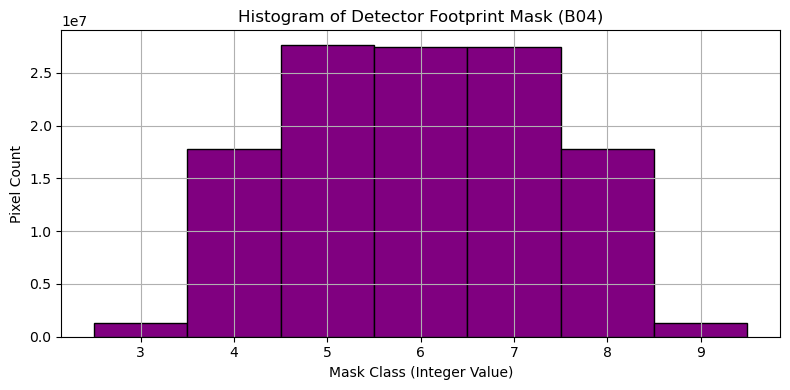

In [35]:
l1c.conditions_mask_detector_footprint_r10m_b04.values
import matplotlib.pyplot as plt
import numpy as np

# Get the mask values as a flat 1D array
vals = l1c.conditions_mask_detector_footprint_r10m_b04.values.flatten()

# Optional: remove no-data values if needed (e.g., 0 or -1)
vals = vals[~np.isnan(vals)]  # if NaNs present
vals = vals[vals >= 0]        # if 0 is background or no-data

# Plot histogram
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(vals, bins=np.arange(vals.min(), vals.max() + 2) - 0.5, color='purple', edgecolor='black')
ax.set_title("Histogram of Detector Footprint Mask (B04)")
ax.set_xlabel("Mask Class (Integer Value)")
ax.set_ylabel("Pixel Count")
ax.grid(True)
plt.tight_layout()
plt.show()

### Lets plot B02 and B04
datashade renders large datasets by aggregating them into a fixed-size image on the server side using pixel-level binning and color mapping, optimized for performance (but no hover).

rasterize also converts large datasets into an image, but preserves some interactivity (like hover) and is generally faster than standard plotting, though less optimized than datashade.

In [43]:
datashade=True
rasterize=False
x='measurements_r10m_x'
y='measurements_r10m_y'
aspect='equal' 

# 1. Measurement B02
plot1 = l1c.measurements_r10m_b02.hvplot(
    x=x,
    y=y,
    cmap='viridis',
    title='Measurement B02 (R10m)',
    frame_width=400,
    datashade=datashade,
    rasterize=rasterize,
    aspect=aspect, 

)

# 2. Measurement B04
plot2 = l1c.measurements_r10m_b04.hvplot(
    x=x,
    y=y,
    cmap='viridis',
    title='Measurement B04 (R10m)',
    frame_width=400,
    datashade=datashade,
    rasterize=rasterize,
    aspect=aspect, 
)

# 3. Conditions B02
plot3 =( l1c.conditions_mask_detector_footprint_r10m_b02
    #.rename({
   # 'conditions_mask_detector_footprint_r10m_x': 'measurements_r10m_x',
    #'conditions_mask_detector_footprint_r10m_y': 'measurements_r10m_y'
#})
    .hvplot.image(
    x=x,
    y=y,
    cmap='magma',
    title='Conditions B02 (Detector footprint)',
    frame_width=400,
    datashade=datashade,
    rasterize=rasterize,
    aspect=aspect, 
))

# 4. Conditions B04
plot4 = (l1c.conditions_mask_detector_footprint_r10m_b04
    #.rename({
   # 'conditions_mask_detector_footprint_r10m_x': 'measurements_r10m_x',
   # 'conditions_mask_detector_footprint_r10m_y': 'measurements_r10m_y'
#})
         .hvplot(
    x=x,
    y=y,
    cmap='magma',
    title='Conditions B04 (Detector footprint)',
    frame_width=400,
    datashade=datashade,
    rasterize=rasterize,
    aspect=aspect, 
))

l2a_quicklook=l2a.quality_l2a_quicklook_r60m_tci.hvplot.rgb(x='quality_l2a_quicklook_r60m_x',
                                              y='quality_l2a_quicklook_r60m_y',
                                              bands='quality_l2a_quicklook_r60m_band',
                                              aspect='equal', 
                                              rasterize=True
                                             )

(plot1+plot2+plot3+plot4+l2a_quicklook).cols(2)  

:Layout
   .DynamicMap.I   :DynamicMap   []
      :RGB   [measurements_r10m_x,measurements_r10m_y]   (R,G,B,A)
   .DynamicMap.II  :DynamicMap   []
      :RGB   [measurements_r10m_x,measurements_r10m_y]   (R,G,B,A)
   .DynamicMap.III :DynamicMap   []
      :RGB   [measurements_r10m_x,measurements_r10m_y]   (R,G,B,A)
   .DynamicMap.IV  :DynamicMap   []
      :RGB   [measurements_r10m_x,measurements_r10m_y]   (R,G,B,A)
   .DynamicMap.V   :DynamicMap   []
      :RGB   [quality_l2a_quicklook_r60m_x,quality_l2a_quicklook_r60m_y]   (R,G,B)

In [11]:
l1c.conditions_mask_detector_footprint_r10m_b04.hvplot.hist(
    bins=50,
    color='green',
    alpha=0.7,
    title='Histogram of Band 4'
)

:NdOverlay   [Variable]
   :Histogram   [conditions_mask_detector_footprint_r10m_b04]   (Count)

In [ ]:

# Make sure the band dimension is named correctly, usually "band"
l2a.quality_l2a_quicklook_r60m_tci.hvplot.rgb(
    x="quality_l2a_quicklook_r60m_x",
    y="quality_l2a_quicklook_r60m_y",
    bands="quality_l2a_quicklook_r60m_band",
    frame_width=600,
    data_aspect=1,
    flip_yaxis=False
)

## Start processing data
### prepare enviroment and load input safe format data

In [ ]:
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import sys
import os
from scipy.interpolate import interpolate
from scipy.interpolate import RectBivariateSpline
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
from scipy.io import savemat
from scipy.io import loadmat
from skimage.filters import sobel

# PATH_with_functions = '/home/ardhuin/TOOLS/OPTOOLS/PYTHON/'

#os.chdir('/home/acuevas/Bureau/S2_ALEXANDRA/OPTOOLS/PYTHON/Carte_courant')
import sys
sys.path.append("S2_Codes/fonction")


from spectral_analysis_functions import FFT2D_two_arrays_nonan
# Using OceanDataLab reader 
#from sentinel2_l1c import *
import numpy as np
from S2_read import S2_read, find
from s2_angs import tan

import warnings
warnings.simplefilter('default')

bands=['B04','B08','B03','B02'];  

#Masha 2016
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/2016/S2A_MSIL1C_20160827T064622_N0204_R020_T39PWL_20160827T065722.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/2016/S2A_MSIL1C_20160827T064622_N0204_R020_T39PWM_20160827T065722.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/2016/S2A_MSIL1C_20160827T064622_N0204_R020_T39PWN_20160827T065722.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/2016/S2A_MSIL1C_20160827T064622_N0204_R020_T39PXL_20160827T065722.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/2016/S2A_MSIL1C_20160827T064622_N0204_R020_T39PXM_20160827T065722.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/2016/S2A_MSIL1C_20160827T064622_N0204_R020_T39PXN_20160827T065722.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/2016/S2A_MSIL1C_20160827T064622_N0204_R020_T39PYL_20160827T065722.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/2016/S2A_MSIL1C_20160827T064622_N0204_R020_T39PYM_20160827T065722.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/2016/S2A_MSIL1C_20160827T064622_N0204_R020_T39PYN_20160827T065722.SAFE/'

#Californie 2023
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SBF_20230427T223909.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SCF_20230427T223909.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SCG_20230427T223909.SAFE/'

# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SDF_20230427T223909.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SDG_20230427T223909.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SBH_20230427T223909.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/30_04_2023/S2B_MSIL1C_20230430T190919_N0509_R056_T10SBG_20230430T211611.SAFE'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SDG_20230427T223909.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/27_04_2023/S2B_MSIL1C_20230427T185919_N0509_R013_T10SDH_20230427T223909.SAFE/'

 #Australie
S2path='/home/acuevas/Bureau/S2_ALEXANDRA/Australie/S2B_MSIL1C_20240401T024319_N0510_R003_T49JEM_20240401T054723.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/Australie/S2B_MSIL1C_20240401T024319_N0510_R003_T49JEN_20240401T054723.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/Australie/S2B_MSIL1C_20240401T024319_N0510_R003_T49JFM_20240401T054723.SAFE/'
# S2path='/home/acuevas/Bureau/S2_ALEXANDRA/Australie/S2B_MSIL1C_20240401T024319_N0510_R003_T49JFN_20240401T054723.SAFE/'
S2path='./S2B_MSIL1C_20240401T024319_N0510_R003_T49JEM_20240401T054723.SAFE/'
#S2path=safe_filename+'/'
Sat='A' # should change depending on the satellite S2A or S2b


### Image reading 
Verify the enviomrnet has the right tool installed

In [ ]:
#!pip install pylibjpeg-openjpeg
#XML_File = find('MTD_TL.xml', S2path)
#XML_File
import rasterio
with rasterio.Env() as env:
    drivers = env.drivers()
    print("JP2OpenJPEG" in drivers)
    print("JP2OpenJPEG mode:", drivers.get("JP2OpenJPEG"))

In [ ]:
XML_File = find('MTD_TL.xml', S2path)
XML_File_DS=find('MTD_DS.xml',S2path)
if XML_File is None:
    print("Le fichier 'MTD_TL.xml' n'a pas été trouvé dans le répertoire spécifié:", S2path)


boxi1=[2500,3000,3000,3500] # East West South North : this box is covered by another detector
[imgs1,NX1,NY1,nx1,ny1,dx1,dy1,offspec1,phitrig1,thetav1,loncenter1,latcenter1,detector,indexX,indexY]=S2_read(S2path,boxi1,bands)
boxi=[8000,8500,5000,5500]
[imgs,NX,NY,nx,ny,dx,dy,offspec,phitrig,thetav,loncenter,latcenter,detector,indexX,indexY]=S2_read(S2path,boxi,bands)

# print('Nx',NX)
# print('Ny',NY)
# print('nx',nx)
# print('ny',ny)
# print('dx',dx)
# print('dy',dy)
print(np.degrees(loncenter))
print(np.degrees(latcenter))

!ls S2_Codes/

### Use S2_codes/Visualisation to visualise the image

In [ ]:
%run S2_Codes/Visualisation_image.ipynb

### Image based on detectors

In [ ]:
print('lon,lat:',np.degrees(loncenter),np.degrees(latcenter))

nb=np.shape(bands)[0]
# Mother_box=[4800,10000,7200,10300]
Mother_box=[2000, 10000, 6000,10000]

taille_boite=500
# taille_boite=700

width=(Mother_box[1] - Mother_box[0]) // taille_boite 
length=(Mother_box[3] - Mother_box[2]) // taille_boite 

# boxi=[6000, 6500, 8000, 8500]
# boxi=[7600,8100,4500,5000]
B04med1=np.median(imgs1[0,:,:].flatten())
B04med=np.median(imgs[0,:,:].flatten())
B08med1=np.median(imgs1[1,:,:].flatten())
B08med=np.median(imgs[1,:,:].flatten())

mediansb=0.5*(np.median(imgs,axis=(1, 2))+np.median(imgs1,axis=(1, 2)))
print('means:',mediansb)

ratio=B04med/B04med1
G4=(B04med-B04med1)/(tan(np.radians(offspec[0]))-tan(np.radians(offspec1[0])))/mediansb[0]
G8=(B08med-B08med1)/(tan(np.radians(offspec[1]))-tan(np.radians(offspec1[1])))/mediansb[1]
                         
Bd1=(np.cos(np.radians(offspec1[0])))**4*np.cos(np.radians(thetav1[0]))
Bd=(np.cos(np.radians(offspec[0])))**4*np.cos(np.radians(thetav[0]))
mss=(np.tan(np.radians(offspec1[0]))**2-np.tan(np.radians(offspec[0]))**2)/np.log(ratio*Bd/Bd1)

print('Median brighness in B04 and mss:',B04med1,B04med,mss,ratio,Bd/Bd1,offspec[0],offspec1[0])
array1=np.squeeze(detector[1,:,:])
fig, ax = plt.subplots() 
im=ax.pcolor(indexX,indexY,array1)
fig.colorbar(im)
ax.set_title('detector index and FFT box location')
ax.set_xlabel('pixel index')
ax.set_ylabel('pixel index')
ax.axis('equal')
rect = mp.patches.Rectangle((boxi[0], boxi[2]), boxi[1]-boxi[0], boxi[3]-boxi[2], linewidth=2,
                         edgecolor='k', facecolor="none")


ax.add_patch(rect)
plt.show()
print('G4',G4)
print(boxi)

### Identifying the detector

In [ ]:
# On determine le centre de la boîte en pixel
def centre_carre(x0,xy0,taille_boite):
    centrex=x0+taille_boite/2
    centrey=y0+taille_boite/2
    return centrex, centrey

x0=boxi[0]
y0=boxi[2]
taille_boite=boxi[1]-boxi[0]
centre=centre_carre(x0,y0,taille_boite)

print('centre boxi',centre)

In [ ]:
indexX2, indexY2 = np.meshgrid(indexX, indexY)
print('shape indexX',np.shape(indexX))
print('shape indexY',np.shape(indexY))
print('shape array1',np.shape(array1))


points = np.column_stack((indexX.ravel(), indexY.ravel()))
values = array1.ravel()

# Interpolation
value = griddata(points, values, centre, method='linear')
value = value.item() 
detector_find=round(value)
print(detector_find)

### Dictionary of detector numbers

In [ ]:
mapping = {
    1: 'D01',
    2: 'D02',
    3: 'D03',
    4: 'D04',
    5: 'D05',
    6: 'D06',
    7: 'D07',
    8: 'D08',
    9: 'D09',
    10: 'D10',
    11: 'D11',
    12: 'D12'
}
if round(value) in mapping:
    Det = mapping[round(value)]
else:
    Det = "Valeur non trouvée"
print(Det)

In [ ]:
import math

#loncenter2=loncenter*180/(math.pi)
#latcenter2=(latcenter*180/math.pi)
loncenter2 = math.degrees(loncenter)
latcenter2 = math.degrees(latcenter)

print(Det)
print(loncenter2)
print(latcenter2)


### Image normalisation and filtering

#### Normalisation
We look at the band B04 and B02 -->  bands=['B04','B08','B03','B02']; 

In [ ]:
# normalizes the image values
print(np.median(imgs[0,:,:].flatten()))
print(imgs[0,:,:])
img1=imgs[0,:,:]/np.median(imgs[0,:,:].flatten())
img2=imgs[3,:,:]/np.median(imgs[3,:,:].flatten())
plt.imshow(np.flipud(np.transpose(img1)),vmin=0.9, vmax=1.1) #edit your vmin, vmax and cmap if you don't like greyscale colormap
plt.colorbar()

plt.show()
plt.imshow(np.flipud(np.transpose(img2)),vmin=0.9, vmax=1.1) #edit your vmin, vmax and cmap if you don't like greyscale colormap
plt.colorbar()
plt.show()
# Sauvegarder au format .mat
# savemat('imgs_frag1_7km.mat', {'data':imgs})

#### Filtering white cap (Sobel filter)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.filters import threshold_otsu
from scipy.ndimage import gaussian_filter

# img_smooth = gaussian_filter(img1, sigma=1)
# gradient_sobel1 = sobel(img_smooth)
# img_smoot2 = gaussian_filter(img2, sigma=1)
# gradient_sobel2 = sobel(img_smoot2)


#Compute the Sobel gradient
gradient_sobel1 = sobel(img1)
gradient_sobel2 = sobel(img2)

# Visualize the gradient
plt.figure(figsize=(8, 4))
plt.imshow(gradient_sobel2, cmap="gist_gray_r", origin="upper")
plt.colorbar(label="Gradient amplitude")
plt.title("Edge detection using Sobel gradient")
plt.show()

# Define an automatic threshold using the 95th percentile
threshold = np.percentile(gradient_sobel1, 95)  
threshold2 = np.percentile(gradient_sobel2, 95)  

# Keep areas with a low gradient
mask = gradient_sobel1 < threshold  
mask2 = gradient_sobel2 < threshold2  

# Apply the mask to the original image
filtered_image1 = np.where(mask, img1, np.nan)  # Replace masked pixels with NaN
filtered_image2 = np.where(mask2, img2, np.nan)  # Replace masked pixels with NaN

# Display the filtered image
plt.figure(figsize=(8, 4))
plt.imshow(np.flipud(np.transpose(filtered_image1)), cmap="viridis", vmin=0.9, vmax=1.1, origin="upper")
plt.colorbar(label="Filtered Image")
plt.title("Filtered Image (after Sobel + Threshold)")
plt.savefig('img1_filtered.png')
plt.show()



In [ ]:
# Display the histogram of values for the original image
plt.figure(figsize=(6, 4))
plt.hist(img1.ravel(), bins=100, color='blue', alpha=0.7, label='Image 1')
plt.hist(img2.ravel(), bins=100, color='red', alpha=0.7, label='Image 2')
plt.xlabel("Values of pixels")
plt.ylabel("Fréquency")
plt.title("Histogramme intensity")
plt.legend()
plt.show()


### Fourier transform with two images

ntile: numbers of tile used for the welch. In the function FTT2D_two_arrays_nonan replaces the nan values in the images with the local mean. The function used when the image is not filtered is FFT2D _two_arrays

spectrum of the brightness of image\
coherence and phase between two images tzo bands \

this notebook show hz to get wave information from S2 L1C image. 


In [ ]:

ntile=16
# (Eta,Etb,ang,angstd,coh,crosr,phases,kx2,ky2,dkx,dky)=FFT2D_two_arrays(img1,img2,10,10,ntile,isplot=0)
(Eta,Etb,ang,angstd,coh,crosr,phases,kx2,ky2,dkx,dky)=FFT2D_two_arrays_nonan(filtered_image1,filtered_image2,10,10,ntile,isplot=0)

print(np.shape(Eta))
print(np.shape(kx2))
print(np.shape(ky2))


phiblind1=phitrig[0]+90.  # blind azimuth for first band
phiblind2=phitrig[1]+90.  # blind azimuth for 3rd band
phiblind3=phitrig[2]+90.  # blind azimuth for 3rd band
kN=50
xkblind=[-1.4*kN*np.sin(np.radians(phiblind2)) , 1.4*kN*np.sin(np.radians(phiblind2))]
ykblind=[-1.4*kN*np.cos(np.radians(phiblind2)) , 1.4*kN*np.cos(np.radians(phiblind2))]


X = np.arange(0,nx*dx,dx) # from 0 to (nx-1)*dx with a dx step
Y = np.arange(0,ny*dy,dy)

fig,axs=plt.subplots(1,2,figsize=(20,7))#,sharey=True,sharex=True)
_=plt.gca().set_aspect('equal', adjustable='box')

# warning: we use an array img1 that is written with X in the first (number 0) dimension and Y in the second
#          but pcolormesh uses the opposite order: hence the use of transpose 

im=axs[0].pcolormesh(X/1000,Y/1000,np.transpose(filtered_image1),cmap='seismic',norm = mcolors.Normalize(vmin=0.5, vmax=2))
_=plt.colorbar(im,ax=axs[0],label='S2 image band B04')
_=axs[0].set_xlabel('X [km]')
_=axs[0].set_ylabel('Y [km]')
_=axs[0].set_title('Surface')

im=axs[1].pcolormesh(kx2*1000,ky2*1000,10*np.log10((Eta)),norm = mcolors.Normalize(vmin=-30, vmax=20))
_=plt.colorbar(im,ax=axs[1],label='dB')
_=plt.plot(xkblind,ykblind,color='k',linestyle='--',linewidth=2)
_=axs[1].set_xlabel('k_x [cycles / km]')
_=axs[1].set_ylabel('k_y [cycles / km]')
_=axs[1].set_title('Spectrum')
_=plt.tight_layout()

print('variance 1:',np.var(img1.flatten()), 'sum of spectrum:',np.sum(Eta.flatten())*dkx*dky )
print('variance 2:',np.var(img2.flatten()), 'sum of spectrum:',np.sum(Etb.flatten())*dkx*dky )


fig,axs=plt.subplots(1,2,figsize=(20,7))#,sharey=True,sharex=True)
_=plt.gca().set_aspect('equal', adjustable='box')

im=axs[0].pcolormesh(kx2*1000,ky2*1000,coh,norm = mcolors.Normalize(vmin=0, vmax=1))
_=plt.colorbar(im,ax=axs[0],label=' ')
_=plt.plot(xkblind,ykblind,color='k',linestyle='--',linewidth=2)
_=axs[1].set_xlabel('k_x [cycles / km]')
_=axs[1].set_ylabel('k_y [cycles / km]')
_=axs[0].set_title('coherence B02-B04')

im=axs[1].pcolormesh(kx2*1000,ky2*1000,np.degrees(ang),cmap='seismic',norm = mcolors.Normalize(vmin=-180, vmax=180))
_=plt.colorbar(im,ax=axs[1],label='degrees')
_=plt.plot(xkblind,ykblind,color='k',linestyle='--',linewidth=2)
_=axs[1].set_xlabel('k_x [cycles / km]')
_=axs[1].set_ylabel('k_y [cycles / km]')
_=axs[1].set_title('cross-spectrum phase')
_=plt.tight_layout()

fig,axs=plt.subplots(1,2,figsize=(20,7))#,sharey=True,sharex=True)
_=plt.gca().set_aspect('equal', adjustable='box')

im=axs[0].pcolormesh(kx2*1000,ky2*1000,10*np.log10((crosr)),norm = mcolors.Normalize(vmin=-30, vmax=20))
_=plt.colorbar(im,ax=axs[0],label=' ')
_=plt.plot(xkblind,ykblind,color='k',linestyle='--',linewidth=2)
_=axs[1].set_xlabel('k_x [cycles / km]')
_=axs[1].set_ylabel('k_y [cycles / km]')
_=axs[0].set_title('real part of X-spec')

im=axs[1].pcolormesh(kx2*1000,ky2*1000,10*np.log10((Eta)),norm = mcolors.Normalize(vmin=-30, vmax=20))
_=plt.colorbar(im,ax=axs[1],label='dB')
_=plt.plot(xkblind,ykblind,color='k',linestyle='--',linewidth=2)
_=axs[1].set_xlabel('k_x [cycles / km]')
_=axs[1].set_ylabel('k_y [cycles / km]')
_=axs[1].set_title('Spectrum')
_=plt.tight_layout()


In [ ]:
fig,axs=plt.subplots(1,2,figsize=(20,7))#,sharey=True,sharex=True)
_=plt.gca().set_aspect('equal', adjustable='box')

im=axs[0].pcolormesh(kx2*2*np.pi,ky2*2*np.pi,coh,norm = mcolors.Normalize(vmin=0, vmax=1))
_=plt.colorbar(im,ax=axs[0],label=' ')
_=axs[0].set_xlabel('k_x [rad / m]')
_=axs[0].set_ylabel('k_y [rad / m]')
_=axs[0].set_title('coherence B02-B04')


In [ ]:
#%run spectral_analysis_functions.py